In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('store_sharing.csv', index_col='timestamp') # parse_dates

In [4]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
df.index

Index(['2015-01-04 00:00:00', '2015-01-04 01:00:00', '2015-01-04 02:00:00',
       '2015-01-04 03:00:00', '2015-01-04 04:00:00', '2015-01-04 05:00:00',
       '2015-01-04 06:00:00', '2015-01-04 07:00:00', '2015-01-04 08:00:00',
       '2015-01-04 09:00:00',
       ...
       '2017-01-03 14:00:00', '2017-01-03 15:00:00', '2017-01-03 16:00:00',
       '2017-01-03 17:00:00', '2017-01-03 18:00:00', '2017-01-03 19:00:00',
       '2017-01-03 20:00:00', '2017-01-03 21:00:00', '2017-01-03 22:00:00',
       '2017-01-03 23:00:00'],
      dtype='object', name='timestamp', length=17414)

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [8]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [10]:
df.shape

(17414, 9)

In [11]:
df['hour']=df.index.hour
df['day_of_week']=df.index.dayofweek
df['day_of_month']=df.index.day
df['month']=df.index.month

In [12]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


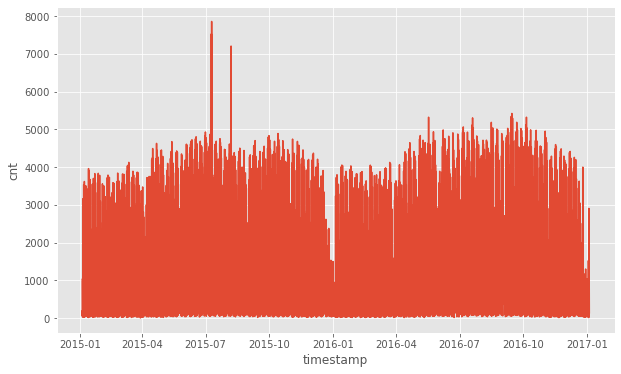

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.index, y='cnt', data=df);

In [14]:
df_by_month = df.resample('M').sum()

In [15]:
df_by_month.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0,7709,2014,11753,671
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0,7707,2015,9734,1342
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0,8540,2174,11751,2217
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0,8270,2131,11156,2876
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0,8556,2376,11904,3720


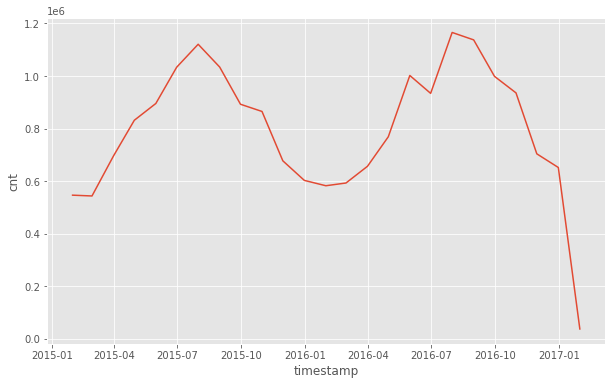

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_by_month.index, y='cnt', data=df_by_month);

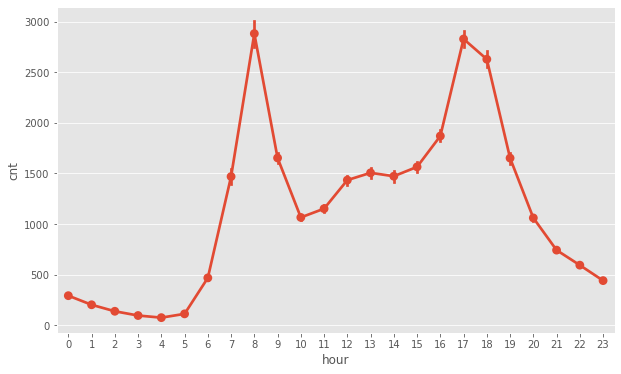

In [17]:
plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='hour',y='cnt');

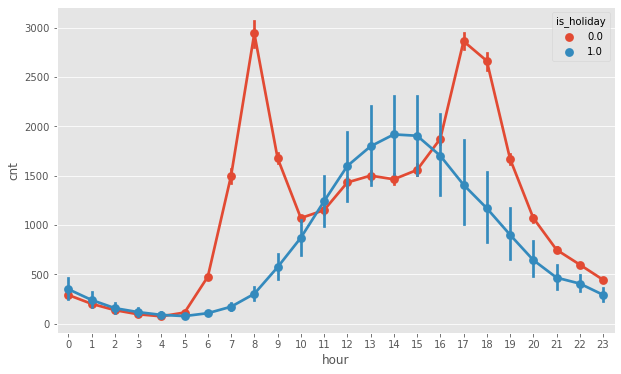

In [18]:
plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='hour',y='cnt', hue='is_holiday');

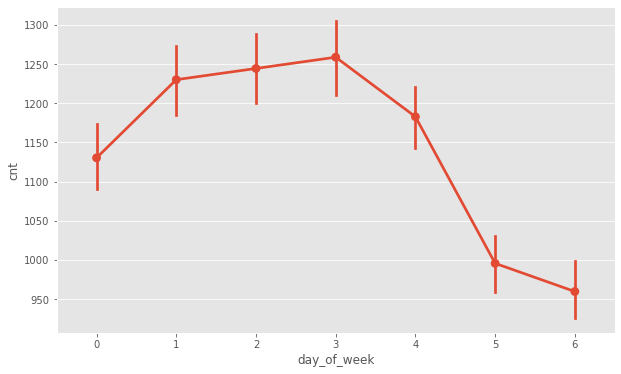

In [19]:
plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='day_of_week',y='cnt');

In [20]:
train_size = int(len(df)*.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train.shape, test.shape)

(15672, 13) (1742, 13)


In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


In [23]:
df.values

array([[182. ,   3. ,   2. , ...,   6. ,   4. ,   1. ],
       [138. ,   3. ,   2.5, ...,   6. ,   4. ,   1. ],
       [134. ,   2.5,   2.5, ...,   6. ,   4. ,   1. ],
       ...,
       [337. ,   5.5,   1.5, ...,   1. ,   3. ,   1. ],
       [224. ,   5.5,   1.5, ...,   1. ,   3. ,   1. ],
       [139. ,   5. ,   1. , ...,   1. ,   3. ,   1. ]])

In [24]:
df.to_numpy()

array([[182. ,   3. ,   2. , ...,   6. ,   4. ,   1. ],
       [138. ,   3. ,   2.5, ...,   6. ,   4. ,   1. ],
       [134. ,   2.5,   2.5, ...,   6. ,   4. ,   1. ],
       ...,
       [337. ,   5.5,   1.5, ...,   1. ,   3. ,   1. ],
       [224. ,   5.5,   1.5, ...,   1. ,   3. ,   1. ],
       [139. ,   5. ,   1. , ...,   1. ,   3. ,   1. ]])

In [25]:
f_columns = ['t1','t2','hum','wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

In [26]:
train[['cnt']]

,cnt
timestamp,
2015-01-04 00:00:00,182
2015-01-04 01:00:00,138
2015-01-04 02:00:00,134
2015-01-04 03:00:00,72
2015-01-04 04:00:00,47
...,...
2016-10-23 03:00:00,217
2016-10-23 04:00:00,150
2016-10-23 05:00:00,107


In [27]:
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']].to_numpy())

In [28]:
train[f_columns]

,t1,t2,hum,wind_speed
timestamp,,,,
2015-01-04 00:00:00,3.0,2.0,93.0,6.0
2015-01-04 01:00:00,3.0,2.5,93.0,5.0
2015-01-04 02:00:00,2.5,2.5,96.5,0.0
2015-01-04 03:00:00,2.0,2.0,100.0,0.0
2015-01-04 04:00:00,2.0,0.0,93.0,6.5
...,...,...,...,...
2016-10-23 03:00:00,8.0,7.0,90.0,6.0
2016-10-23 04:00:00,8.0,7.0,93.0,6.0
2016-10-23 05:00:00,8.0,8.0,87.0,4.0


In [29]:
train['cnt']

timestamp
2015-01-04 00:00:00    182
2015-01-04 01:00:00    138
2015-01-04 02:00:00    134
2015-01-04 03:00:00     72
2015-01-04 04:00:00     47
                      ... 
2016-10-23 03:00:00    217
2016-10-23 04:00:00    150
2016-10-23 05:00:00    107
2016-10-23 06:00:00    107
2016-10-23 07:00:00    173
Name: cnt, Length: 15672, dtype: int64

In [30]:
train.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


In [31]:
train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt']= cnt_transformer.transform(train[['cnt']].to_numpy())

test.loc[:,f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt']= cnt_transformer.transform(test[['cnt']].to_numpy())

In [32]:
def create_dataset(X,y, time_steps=1):
    Xs, ys = [],[]
    for i in range(len(X)- time_steps):
        v = X.iloc[i: (i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [33]:
TIME_STEPS = 24

X_train, y_train = create_dataset(train, train.cnt, time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test, test.cnt, time_steps=TIME_STEPS)



In [34]:
print(X_train.shape, y_train.shape)

(15648, 24, 13) (15648,)


_Number of samples, time steps, number of features_

In [41]:
X_train.shape[0]

TypeError: 'int' object is not subscriptable

In [35]:
print(X_test.shape, y_test.shape)

(1718, 24, 13) (1718,)


In [36]:
X_test[0].shape

(24, 13)

In [37]:
X_test[0][0].shape

(13,)

In [128]:
from tensorflow.keras.layers import Bidirectional,Dropout,Dense,LSTM
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,History

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score

In [129]:
model = Sequential()
model.add(
    Bidirectional(
        LSTM(
            units=13,
            input_shape=(X_train.shape[1], X_train.shape[2])
        
        )    
    )
)

model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

In [130]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [131]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.1,
    shuffle=False,
)

Epoch 1/100
56/56 [==============================] - 11s 63ms/step - loss: 0.8533 - val_loss: 0.5948
Epoch 2/100
56/56 [==============================] - 2s 27ms/step - loss: 0.5220 - val_loss: 0.5018
Epoch 3/100
56/56 [==============================] - 1s 25ms/step - loss: 0.4220 - val_loss: 0.4516
Epoch 4/100
56/56 [==============================] - 1s 26ms/step - loss: 0.3727 - val_loss: 0.4044
Epoch 5/100
56/56 [==============================] - 1s 24ms/step - loss: 0.3126 - val_loss: 0.3648
Epoch 6/100
56/56 [==============================] - 1s 24ms/step - loss: 0.2857 - val_loss: 0.3277
Epoch 7/100
56/56 [==============================] - 1s 24ms/step - loss: 0.2574 - val_loss: 0.3018
Epoch 8/100
56/56 [==============================] - 1s 25ms/step - loss: 0.2411 - val_loss: 0.2779
Epoch 9/100
56/56 [==============================] - 1s 25ms/step - loss: 0.2245 - val_loss: 0.2584
Epoch 10/100
56/56 [==============================] - 1s 25ms/step - loss: 0.2131 - val_loss: 0.241

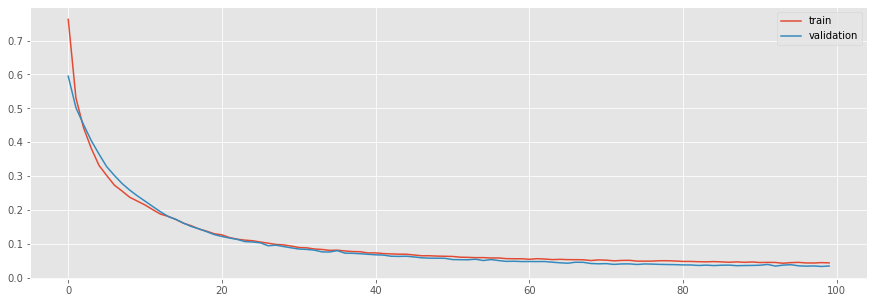

In [133]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [134]:
y_pred = model.predict(X_test)

In [168]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

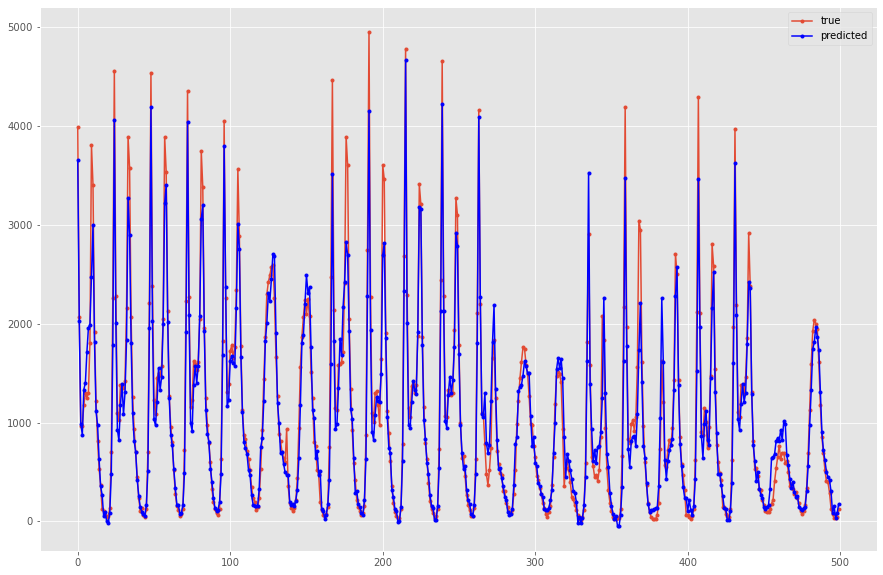

In [171]:
plt.figure(figsize=(15,10))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label='true')
plt.plot(y_pred_inv[0:500], 'b',marker='.', label='predicted')
plt.legend();

In [148]:
y_pred.flatten()

array([ 1.9241242 ,  0.8057671 ,  0.08619703, ..., -0.27911395,
       -0.358629  , -0.42004693], dtype=float32)

In [146]:
y_test.flatten()

array([ 2.15426997,  0.83539945,  0.07644628, ..., -0.35812672,
       -0.43595041, -0.49449036])

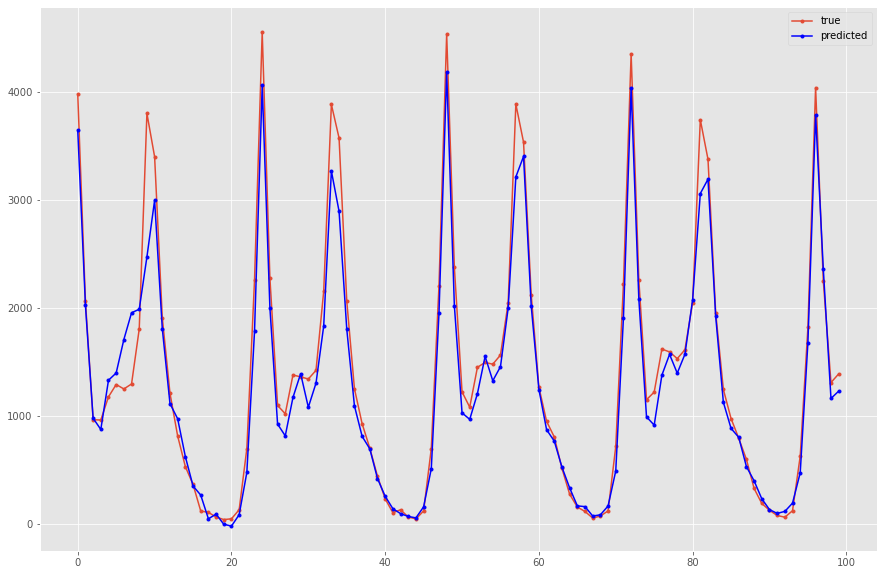

In [165]:
plt.figure(figsize=(15,10))
plt.plot(y_test_inv.flatten()[0:100], marker='.', label='true')
plt.plot(y_pred_inv[0:100], 'b',marker='.', label='predicted')
plt.legend();

In [166]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [173]:
eval_metrics(y_test_inv.reshape(-1,1), y_pred_inv)

R2 Score: 0.9300024701623871
Mean Absolute Error(MAE): 149.314324677615
Mean Square Error(MSE): 60544.87735914752
Root Mean Square Error(RMSE): 246.0586868191154


In [ ]:
df

In [212]:
sample = train.drop('cnt',axis=1).iloc[0].to_numpy().reshape(-1,1)

In [213]:
sample

array([[-1.25      ],
       [-1.04761905],
       [ 0.975     ],
       [-0.81818182],
       [ 3.        ],
       [ 0.        ],
       [ 1.        ],
       [ 3.        ],
       [ 0.        ],
       [ 6.        ],
       [ 4.        ],
       [ 1.        ]])

In [214]:
sample_pred = model.predict(sample)

ValueError: in user code:

    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\micha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
